#Bibliotecas

In [1]:
!pip install rasterio

     |████████████████████████████████| 18.3MB 169kB/s 


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import threading
import rasterio
import warnings
import time
import os
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from multiprocessing import Process, Value, Array, Lock
from rasterio import plot
# %matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
caminho_raiz = '/content/drive/My Drive/Colab Notebooks/Imagens/'

In [5]:
caminho_2018 = '/content/drive/My Drive/Colab Notebooks/Imagens/2018/'
caminho_2019 = '/content/drive/My Drive/Colab Notebooks/Imagens/2019/'
caminho_2020 = '/content/drive/My Drive/Colab Notebooks/Imagens/2020/'

In [6]:
band4_2018 = rasterio.open(caminho_2018+'REC_LO82250642018236CUB00_B4.tif') #Vermelho
band5_2018 = rasterio.open(caminho_2018+'REC_LO82250642018236CUB00_B5.tif') #Infra-Vermelho próximo
band6_2018 = rasterio.open(caminho_2018+'REC_LO82250642018236CUB00_B6.tif') #Infra-Vermelho médio
band7_2018 = rasterio.open(caminho_2018+'REC_LO82250642018236CUB00_B7.tif') #Infra-Vermelho médio

In [7]:
band4_2019 = rasterio.open(caminho_2019+'REC_LO82250642019239CUB00_B4.tif') #Vermelho
band5_2019 = rasterio.open(caminho_2019+'REC_LO82250642019239CUB00_B5.tif') #Infra-Vermelho próximo
band6_2019 = rasterio.open(caminho_2019+'REC_LO82250642019239CUB00_B6.tif') #Infra-Vermelho médio
band7_2019 = rasterio.open(caminho_2019+'REC_LO82250642019239CUB00_B7.tif') #Infra-Vermelho médio

In [8]:
band4_2020 = rasterio.open(caminho_2020+'REC_LO82250642020258CUB00_B4.tif') #Vermelho
band5_2020 = rasterio.open(caminho_2020+'REC_LO82250642020258CUB00_B5.tif') #Infra-Vermelho próximo
band6_2020 = rasterio.open(caminho_2020+'REC_LO82250642020258CUB00_B6.tif') #Infra-Vermelho médio
band7_2020 = rasterio.open(caminho_2020+'REC_LO82250642020258CUB00_B7.tif') #Infra-Vermelho médio

#Funções

In [9]:
def graficos(imagem_2018, imagem_2019, imagem_2020, titulo, cor):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10))

  ax1.set_title(titulo[0])
  ax2.set_title(titulo[1])
  ax3.set_title(titulo[2])

  plt.setp([ax1, ax2, ax3], xticks=[], yticks=[])

  plot.show(imagem_2018, ax=ax1, cmap= cor)
  plot.show(imagem_2019, ax=ax2, cmap= cor)
  plot.show(imagem_2020, ax=ax3, cmap= cor)

  fig.tight_layout()

In [10]:
def ndvi_nbr(band1, band2):
    band1 = band1.read(1).astype('float64')
    band2 = band2.read(1).astype('float64')

    ndvi_nbr = np.where(
                (band1+band2)==0., 
                0, 
                (band1-band2)/(band1+band2))
    
    return ndvi_nbr

In [11]:
def criar_imagem(nome, array):
    #info(nome)
    caminho = '/content/drive/My Drive/Colab Notebooks/Imagens/{0}'.format(nome)
    imagem = rasterio.open(caminho,'w',driver='Gtiff',
                              width=band4_2018.width, 
                              height = band4_2018.height, 
                              count=1, crs=band4_2018.crs, 
                              transform=band4_2018.transform, 
                              dtype='float64')
    imagem.write(array,1)
    imagem.close()

In [12]:
def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())
    print('\n')

#Dicionário
50 imagens

In [13]:
dic_array = {}

dic_array['NDVI/REC_NDVI_2018.tif'] =  ndvi_nbr(band5_2018, band4_2018)
dic_array['NDVI/REC_NDVI_2019.tif'] =  ndvi_nbr(band5_2019, band4_2019)
dic_array['NDVI/REC_NDVI_2020.tif'] =  ndvi_nbr(band5_2020, band4_2020)

dic_array['NBR/REC_NBR_2018.tif'] =  ndvi_nbr(band5_2018, band6_2018)
dic_array['NBR/REC_NBR_2019.tif'] =  ndvi_nbr(band5_2019, band6_2019)
dic_array['NBR/REC_NBR_2020.tif'] =  ndvi_nbr(band5_2020, band6_2020)

dic_array['NBR/REC_NBR_2019_2020.tif'] = ndvi_nbr(band5_2019, band7_2019) - ndvi_nbr(band5_2020, band7_2020)
dic_array['NBR/REC_NBR_2018_2019.tif'] = ndvi_nbr(band5_2018, band7_2018) - ndvi_nbr(band5_2019, band7_2019)
dic_array['NBR/REC_NBR_2018_2020.tif'] = ndvi_nbr(band5_2018, band7_2018) - ndvi_nbr(band5_2020, band7_2020)

dic_array['NDVI/REC_NDVI_2019_2020.tif'] = ndvi_nbr(band5_2019, band4_2019) - ndvi_nbr(band5_2020, band4_2020)
dic_array['NDVI/REC_NDVI_2018_2019.tif'] = ndvi_nbr(band5_2018, band4_2018) - ndvi_nbr(band5_2019, band4_2019)
dic_array['NDVI/REC_NDVI_2018_2020.tif'] = ndvi_nbr(band5_2018, band4_2018) - ndvi_nbr(band5_2020, band4_2020)

In [14]:
for i in range(1, 39):
  nome = "teste/teste_" + str(i) + ".tif"
  dic_array[nome] =  ndvi_nbr(band7_2018, band4_2018)

#Execução sem paralelismo


In [30]:
inicio = time.time()

for nome, array in dic_array.items():
  criar_imagem(nome, array)

final = time.time()

print("Tempo: ", final-inicio)

Tempo:  198.78175163269043


#Execução com paralelismo

In [31]:
inicio = time.time()

processos = [] 
if __name__ == '__main__':
  for nome, array in dic_array.items():
    processo = Process(target=criar_imagem, args=(nome, array))
    processo.start()
    processos.append(processo)

  for p in processos:
    p.join()

final = time.time()

print("Tempo: ", final-inicio)

Tempo:  93.0913074016571
Tempo:  85.27980995178223


#Execução com paralela (Threading)

In [32]:
inicio = time.time()

threads = [] 
if __name__ == '__main__':
  for nome, array in dic_array.items():
    processo = threading.Thread(target=criar_imagem, args=(nome, array))
    processo.start()
    threads.append(processo)

  for t in threads:
    t.join()

final = time.time()

print("Tempo: ", final-inicio)

Tempo:  131.13328552246094


#Carregando as imagens

In [18]:
NBR_2018  = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2018.tif')
NBR_2019  = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2019.tif')
NBR_2020  = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2020.tif')

NDVI_2018 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2018.tif')
NDVI_2019 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2019.tif')
NDVI_2020 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2020.tif')

NDVI_2018_2020 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2018_2020.tif')
NDVI_2018_2019 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2018_2019.tif')
NDVI_2019_2020 = rasterio.open(caminho_raiz + 'NDVI/REC_NDVI_2019_2020.tif')

NBR_2018_2020 = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2018_2020.tif')
NBR_2018_2019 = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2018_2019.tif')
NBR_2019_2020 = rasterio.open(caminho_raiz + 'NBR/REC_NBR_2019_2020.tif')

# Realizando o NDVI (Índice de vegetação com diferença normalizada)

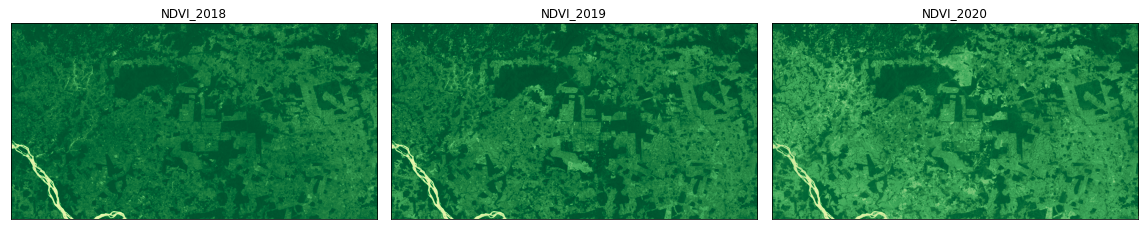

In [19]:
graficos(NDVI_2018, NDVI_2019, NDVI_2020, ['NDVI_2018', 'NDVI_2019', 'NDVI_2020'], 'YlGn')

In [20]:
#Invertendo a 'palheta de cor' YlGn

color_map = plt.cm.get_cmap('YlGn')
reversed_color_map = color_map.reversed()

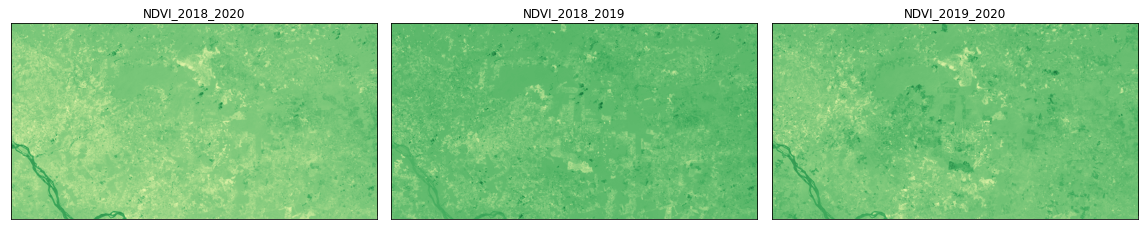

In [21]:
graficos(NDVI_2018_2020, NDVI_2018_2019, NDVI_2019_2020, ['NDVI_2018_2020', 'NDVI_2018_2019', 'NDVI_2019_2020'], reversed_color_map)

# Realizando o cálculo do IC (Índice de cobertura vegetal)

In [22]:
dados = pd.DataFrame()
dados['NDVI_2018'] = NDVI_2018.read(1)[:, 0]
dados['NDVI_2019'] = NDVI_2019.read(1)[:, 0]
dados['NDVI_2020'] = NDVI_2020.read(1)[:, 0]

In [23]:
IC_2018 = (dados['NDVI_2018'].sum()/dados['NDVI_2018'].count())*100
IC_2018

65.52241331910025

In [24]:
IC_2019 = (dados['NDVI_2019'].sum()/dados['NDVI_2019'].count())*100
IC_2019

59.97678526001765

In [25]:
IC_2020 = (dados['NDVI_2020'].sum()/dados['NDVI_2020'].count())*100
IC_2020

49.178283924459734

# Realizando o NBR (Índice de queimada por razão normalizada )

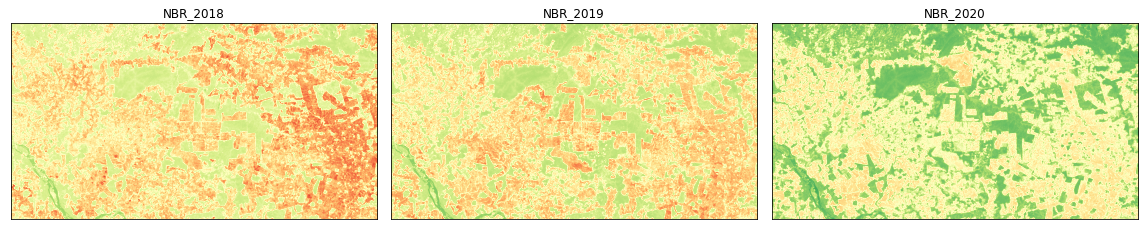

In [26]:
graficos(NBR_2018, NBR_2019, NBR_2020, ['NBR_2018', 'NBR_2019', 'NBR_2020'], 'RdYlGn')

In [27]:
#Invertendo a 'palheta de cor' RdYlGn

color_map = plt.cm.get_cmap('YlGn')
reversed_color_map = color_map.reversed()

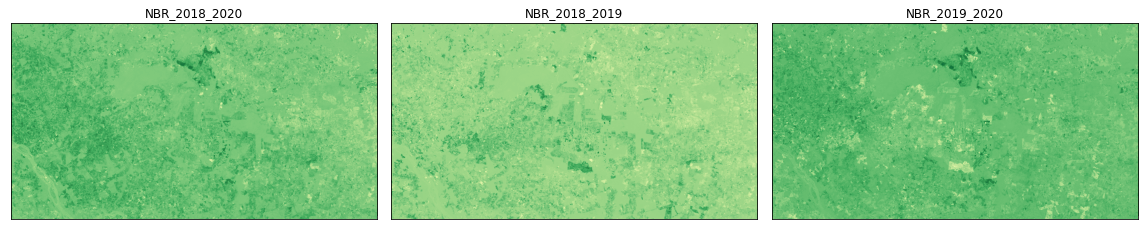

In [28]:
graficos(NBR_2018_2020, NBR_2018_2019, NBR_2019_2020, ['NBR_2018_2020', 'NBR_2018_2019', 'NBR_2019_2020'], 'YlGn')